# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u>References and sources </u>

Regression.Boston.ipynb from Canvas under Files/Example Jupyter Notebooks

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
np.random.seed(42)

#### Code the solution

#### Load the dataset

In [ ]:
# Mounts Google Drive in Google Colab.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
csv_file = "/content/drive/MyDrive/homework3_input_data.csv"
concrete_df = pd.read_csv(csv_file) # Reads the csv file and stores it in a dataframe.
feature_names = ["cement", "slag", "flyash", "water", "superplasticizer", "coarseaggregate", "fineaggregate", "age"] # List of feature/column names.
X = concrete_df[feature_names] # Stores the independent variables.
Y = concrete_df["csMPa"] # Stores the dependent variable.
concrete_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Plot all independent variables vs. the dependent variable

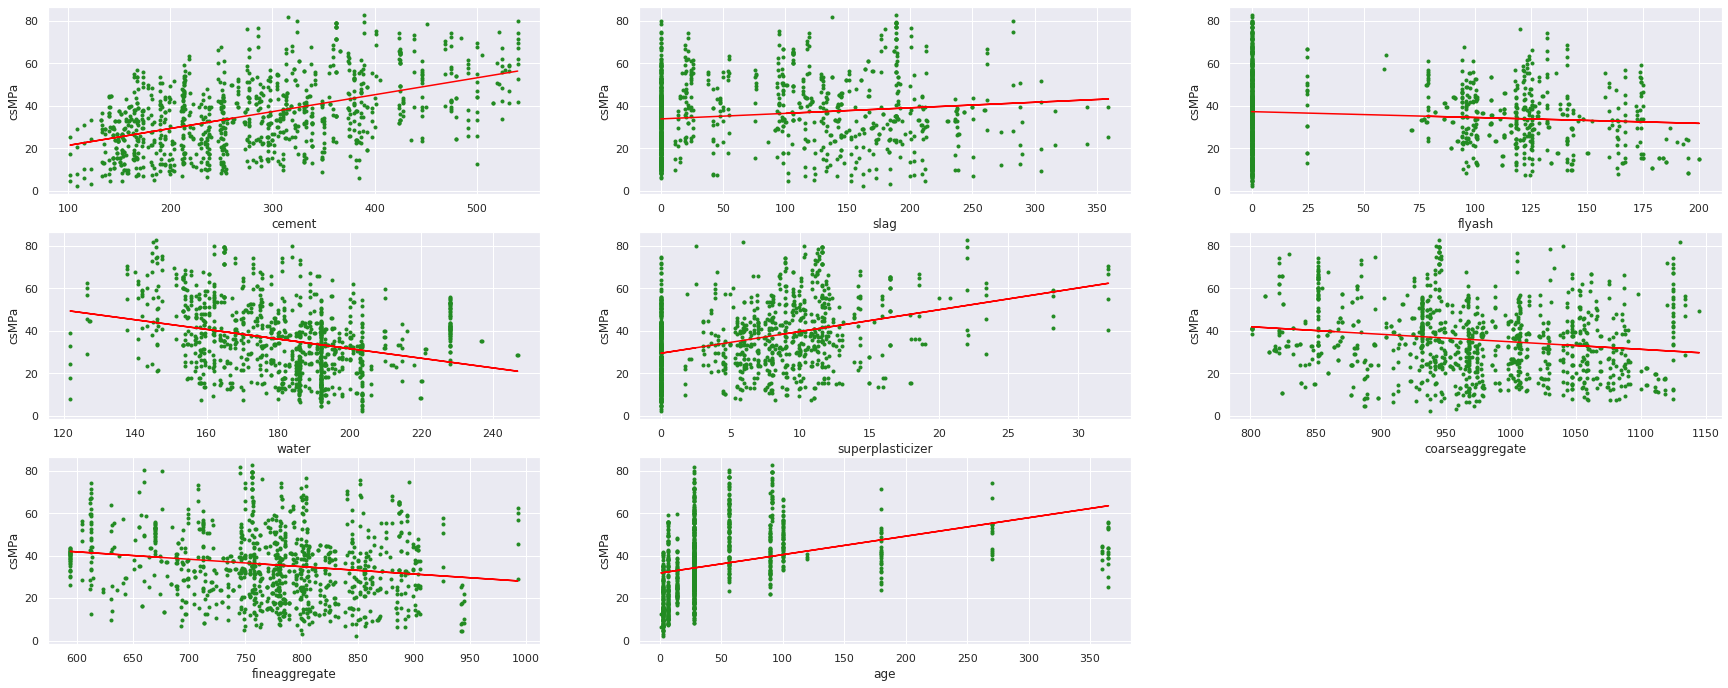

In [ ]:
plt.figure(figsize=(30,20))
for i, col in enumerate(concrete_df.columns[0:8]):
  plt.subplot(5, 3, i+1)
  x = concrete_df[col]
  y = concrete_df["csMPa"]
  plt.plot(x, y, '.', color="forestgreen")
  m, b = np.polyfit(x, y, 1)
  plt.plot(x, m*x + b, color="red")
  plt.xlabel(col)
  plt.ylabel('csMPa')

#### Correlation matrix between the independent variables

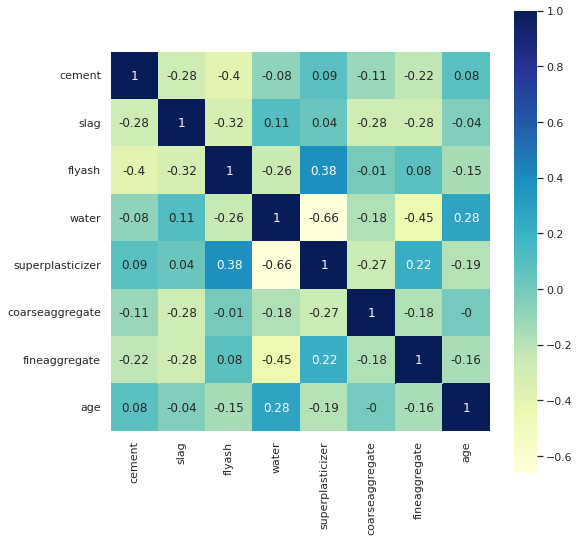

In [ ]:
features = concrete_df[feature_names]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True);

#### Break the data into training and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Train a linear regression model to predict csMPa values based on the input variables

In [ ]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

#### Report the mean squared error and coefficient of determination for the test data

In [ ]:
Y_test_pred = model.predict(X_test)
print('Mean squared error for the test data: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of determination for the test data: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error for the test data: 95.62
Coefficient of determination for the test data: 0.64


#### Plot the predicted vs. actual csMPa values 

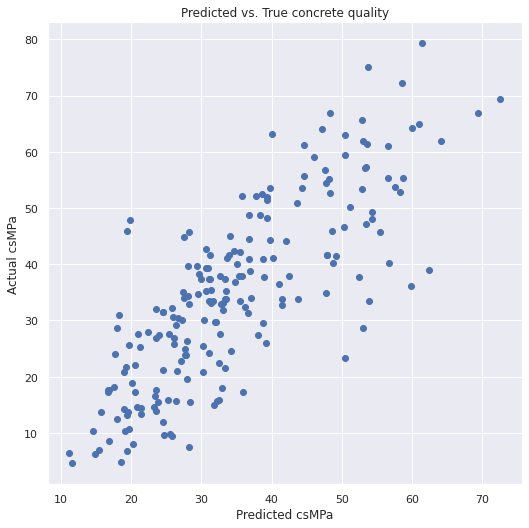

In [ ]:
plt.scatter(Y_test_pred, Y_test)
plt.xlabel('Predicted csMPa')
plt.ylabel('Actual csMPa')
plt.title('Predicted vs. True concrete quality');